In [45]:
import os
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("./src/kc_house_data.csv", index_col="id")

In [47]:
df = df.drop(columns=["date"]).reset_index(drop=True)

In [48]:
df, df_valid = train_test_split(df, train_size=15_000)

# Some EDA

In [49]:
# Рассмотрим категориальные признаки
df.waterfront.unique(), df.view.unique(), df.condition.unique(), df.grade.unique(), df.floors.unique()

(array([0, 1]),
 array([0, 2, 3, 4, 1]),
 array([3, 4, 5, 2, 1]),
 array([ 7,  9,  8,  6, 10, 11, 12,  4,  5, 13,  3,  1]),
 array([1. , 2. , 1.5, 3. , 2.5, 3.5]))

In [50]:
# Количество различных почтовых индексов
len(df.zipcode.unique())

70

In [51]:
df["log_price"] = np.log1p(df.price)
df_valid["log_price"] = np.log1p(df_valid.price)

<AxesSubplot:xlabel='zipcode'>

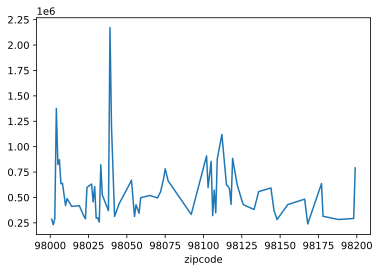

In [52]:
df.groupby("zipcode").price.mean().plot()

<AxesSubplot:xlabel='zipcode'>

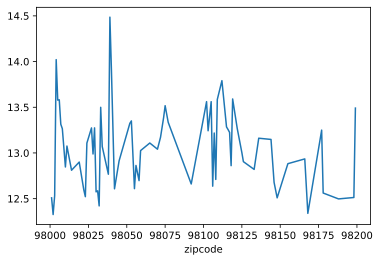

In [53]:
df.groupby("zipcode").log_price.mean().plot()

Сгруппируем почтовые индексы по лог-цене жилья и сделаем категориальный признак

In [54]:
zip_category = {
    0: [14, 14.5],
    1: [13.5, 14],
    2: [13, 13.5],
    3: [12.5, 13],
    4: [12, 12.5],
}

In [55]:
df = df.join((df.groupby("zipcode").log_price.mean()), on="zipcode", how="left", rsuffix="_mean")
df_valid = df_valid.join((df.groupby("zipcode").log_price.mean()), on="zipcode", how="left", rsuffix="_mean")

In [56]:
df_valid

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_price_mean
8726,614000.0,4,2.75,2760,8160,1.5,0,2,4,8,...,980,1940,0,98177,47.7248,-122.365,2720,8160,13.327752,13.249373
15757,325000.0,2,2.25,1550,2285,2.0,0,0,3,8,...,0,2007,0,98106,47.5398,-122.369,1550,2135,12.691584,12.636798
17706,179950.0,4,1.50,1130,5200,1.0,0,0,3,6,...,0,1968,0,98042,47.3616,-122.089,1140,5200,12.100440,12.608022
15503,395000.0,4,2.50,2250,6840,2.0,0,0,3,9,...,0,1987,0,98058,47.4398,-122.151,2480,7386,12.886644,12.697482
2468,824000.0,4,2.50,2320,14240,1.0,0,0,4,9,...,700,1974,0,98008,47.6269,-122.090,2810,13200,13.621927,13.265437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18134,330000.0,4,1.50,1890,7540,1.0,0,0,4,7,...,0,1967,0,98155,47.7534,-122.318,1890,8515,12.706851,12.882550
5196,572000.0,3,2.75,2200,3885,2.0,0,0,3,8,...,0,2002,0,98074,47.6171,-122.028,2710,6000,13.256896,13.385983
5662,898000.0,5,1.50,2680,28014,1.0,0,0,4,8,...,1230,1963,0,98004,47.6348,-122.196,2900,22180,13.707926,14.020328
16888,995000.0,5,4.00,5610,22529,2.0,0,0,3,11,...,1520,1996,0,98072,47.7239,-122.092,3860,24751,13.810499,13.171980


In [57]:
df["zipcode_cat"] = 0
df_valid["zipcode_cat"] = 0
for code, price in zip_category.items():
    df.loc[(price[0] <= df.log_price_mean) &  (df.log_price_mean < price[1]), "zipcode_cat"] = code
    df_valid.loc[(price[0] <= df_valid.log_price_mean) &  (df_valid.log_price_mean < price[1]), "zipcode_cat"] = code

In [58]:
df.yr_renovated.unique()

array([   0, 2003, 1999, 2005, 1996, 2007, 2011, 1997, 1975, 1964, 2008,
       2015, 2002, 1994, 2000, 1953, 2004, 1967, 1965, 1985, 1988, 1998,
       2014, 2009, 2013, 1980, 1960, 1974, 1986, 1987, 1992, 1995, 1983,
       2010, 2006, 1993, 2001, 1982, 1989, 1972, 1978, 1984, 1990, 1969,
       1968, 1981, 1973, 2012, 1950, 1991, 1970, 1946, 1979, 1963, 1956,
       1944, 1940, 1951, 1977, 1962, 1945, 1957, 1955, 1954, 1958, 1934,
       1971, 1976])

In [59]:
# Новый бинарный признак: проводилась ли реновация
df["is_renovated"] = (df.yr_renovated > 0).astype(int)
df_valid["is_renovated"] = (df_valid.yr_renovated > 0).astype(int)

# Prepare data

In [60]:
from sklearn.preprocessing import  StandardScaler, OneHotEncoder

In [61]:
cat_features = ["zipcode_cat", "view", "condition", "bedrooms", "grade", "floors"]
bin = ["waterfront", "is_renovated"]
numeric = [
    "bathrooms", 
    "sqft_living", 
    "sqft_lot", 
    "sqft_above", 
    "sqft_basement", 
    "yr_built", 
    "yr_renovated",
    "lat",	
    "long",	
    "sqft_living15",
    "sqft_lot15"
]
target = "price"

In [62]:
ohe_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False).fit(df[cat_features])
df_cat = ohe_encoder.transform(df[cat_features])
df_valid_cat = ohe_encoder.transform(df_valid[cat_features])

In [63]:
scaler = StandardScaler().fit(df[numeric])
df_num = scaler.transform(df[numeric])
df_valid_num = scaler.transform(df_valid[numeric])

In [64]:
train = np.concatenate((df[bin], df_cat, df_num), axis=1)
val = np.concatenate((df_valid[bin], df_valid_cat, df_valid_num), axis=1)

# Experiments

In [65]:
from src.ensembles import RandomForestRMSE, GradientBoostingRMSE

## RF

## n_estimators

In [66]:
model = RandomForestRMSE(max_depth=8, n_estimators=10000)

In [67]:
result = model.fit(
    train, 
    np.array(df[target]).reshape(-1),
    val, 
    np.array(df_valid[target]).reshape(-1),
    trace=True,
    verbose=1000
)

  0%|          | 4/10000 [00:00<04:47, 34.78it/s]

Время тренировки 0-ого дерева:  0.029 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  232865.492
#------------------------------#


 10%|█         | 1004/10000 [00:25<03:57, 37.89it/s]

Время тренировки 1000-ого дерева:  0.022 c.
Время валидации 1000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1001 деревьев:  154929.758
#------------------------------#


 20%|██        | 2006/10000 [00:51<03:58, 33.53it/s]

Время тренировки 2000-ого дерева:  0.024 c.
Время валидации 2000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 2001 деревьев:  155115.535
#------------------------------#


 30%|███       | 3004/10000 [01:18<03:00, 38.65it/s]

Время тренировки 3000-ого дерева:  0.022 c.
Время валидации 3000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 3001 деревьев:  154948.719
#------------------------------#


 40%|████      | 4008/10000 [01:44<02:46, 35.90it/s]

Время тренировки 4000-ого дерева:  0.029 c.
Время валидации 4000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 4001 деревьев:  154864.245
#------------------------------#


 50%|█████     | 5006/10000 [02:10<02:08, 38.94it/s]

Время тренировки 5000-ого дерева:  0.015 c.
Время валидации 5000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 5001 деревьев:  154892.120
#------------------------------#


 60%|██████    | 6008/10000 [02:36<01:30, 44.13it/s]

Время тренировки 6000-ого дерева:  0.020 c.
Время валидации 6000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 6001 деревьев:  155063.974
#------------------------------#


 70%|███████   | 7005/10000 [03:02<01:16, 39.36it/s]

Время тренировки 7000-ого дерева:  0.028 c.
Время валидации 7000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 7001 деревьев:  155060.205
#------------------------------#


 80%|████████  | 8006/10000 [03:27<00:47, 41.90it/s]

Время тренировки 8000-ого дерева:  0.025 c.
Время валидации 8000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 8001 деревьев:  154918.987
#------------------------------#


 90%|█████████ | 9010/10000 [03:51<00:20, 48.34it/s]

Время тренировки 9000-ого дерева:  0.029 c.
Время валидации 9000-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 9001 деревьев:  154981.549
#------------------------------#


100%|██████████| 10000/10000 [04:15<00:00, 39.21it/s]

Метод: Random Forest
Параметры:
|-> Число деревьев: 10000
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.333
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  228.85 c.
RMSE ансамбля на валидации:  154979.177


In [68]:
check_num_trees =  np.array([10,20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]) - 1

In [69]:
val_score = result[-1]
train_time = result[1]

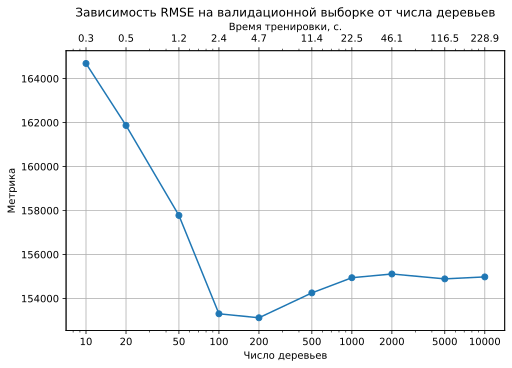

In [70]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(check_num_trees + 1, np.array(val_score)[check_num_trees], marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от числа деревьев")
ax.set_xlabel("Число деревьев")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(ticks=check_num_trees + 1)
ax.set_xticklabels(labels=check_num_trees + 1)
plt.grid("on")

ax2 = ax.twiny()
ax2.set_xscale("log")       
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(np.cumsum(train_time)[check_num_trees], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top')
# set the position of the second x-axis to bottom
plt.savefig("./src/plots/rf_n_estimators.svg")
plt.show()

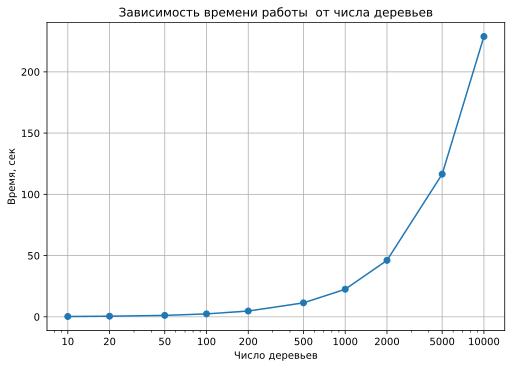

In [71]:

fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(check_num_trees + 1, np.array(np.cumsum(train_time))[check_num_trees], marker="o")
ax.set_title("Зависимость времени работы  от числа деревьев")
ax.set_xlabel("Число деревьев")
ax.set_ylabel("Время, сек")
ax.set_xscale("log")
ax.set_xticks(ticks=check_num_trees + 1)
ax.set_xticklabels(labels=check_num_trees + 1)
plt.grid("on")
plt.savefig("./src/plots/rf_n_estimators_time.svg")
plt.show()

## feature_subsample_size

In [102]:
feature_subsample_size = [0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1]

In [103]:
train_scores = []
val_scores = []
train_time = []
for size in feature_subsample_size:
    model = RandomForestRMSE(
        n_estimators=200,
        max_depth=8,
        feature_subsample_size=size
    )
    result = model.fit(
        train, 
        np.array(df.price).reshape(-1),
        val, 
        np.array(df_valid.price).reshape(-1),
        trace=True,
        verbose=100
    )
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))

  2%|▏         | 4/200 [00:00<00:05, 35.54it/s]

Время тренировки 0-ого дерева:  0.016 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  245303.266
#------------------------------#


 54%|█████▍    | 108/200 [00:02<00:02, 45.23it/s]

Время тренировки 100-ого дерева:  0.014 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  159723.575
#------------------------------#


100%|██████████| 200/200 [00:04<00:00, 42.02it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.300
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  4.19 c.
RMSE ансамбля на валидации:  158839.322


  2%|▏         | 4/200 [00:00<00:06, 29.08it/s]

Время тренировки 0-ого дерева:  0.028 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  190496.478
#------------------------------#


 52%|█████▏    | 104/200 [00:03<00:03, 28.18it/s]

Время тренировки 100-ого дерева:  0.022 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  141500.371
#------------------------------#


100%|██████████| 200/200 [00:07<00:00, 27.23it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.500
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  6.70 c.
RMSE ансамбля на валидации:  141582.523


  2%|▏         | 3/200 [00:00<00:08, 23.13it/s]

Время тренировки 0-ого дерева:  0.042 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  177267.198
#------------------------------#


 52%|█████▏    | 104/200 [00:04<00:04, 22.98it/s]

Время тренировки 100-ого дерева:  0.030 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  138086.028
#------------------------------#


100%|██████████| 200/200 [00:08<00:00, 23.59it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.600
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  7.82 c.
RMSE ансамбля на валидации:  138172.248


  1%|          | 2/200 [00:00<00:10, 18.95it/s]

Время тренировки 0-ого дерева:  0.054 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  209912.571
#------------------------------#


 52%|█████▎    | 105/200 [00:05<00:04, 20.38it/s]

Время тренировки 100-ого дерева:  0.041 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  138007.115
#------------------------------#


100%|██████████| 200/200 [00:10<00:00, 19.95it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  9.27 c.
RMSE ансамбля на валидации:  137793.004


  1%|          | 2/200 [00:00<00:12, 16.32it/s]

Время тренировки 0-ого дерева:  0.056 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  192809.899
#------------------------------#


 52%|█████▏    | 103/200 [00:05<00:05, 17.92it/s]

Время тренировки 100-ого дерева:  0.044 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  138106.325
#------------------------------#


100%|██████████| 200/200 [00:11<00:00, 17.09it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.800
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  10.81 c.
RMSE ансамбля на валидации:  138387.808


  1%|          | 2/200 [00:00<00:12, 15.57it/s]

Время тренировки 0-ого дерева:  0.058 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  179306.561
#------------------------------#


 52%|█████▏    | 104/200 [00:06<00:05, 17.46it/s]

Время тренировки 100-ого дерева:  0.046 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  140289.467
#------------------------------#


100%|██████████| 200/200 [00:11<00:00, 16.90it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.850
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  11.02 c.
RMSE ансамбля на валидации:  140409.338


  1%|          | 2/200 [00:00<00:12, 15.38it/s]

Время тренировки 0-ого дерева:  0.059 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  185510.576
#------------------------------#


 52%|█████▏    | 104/200 [00:06<00:05, 16.05it/s]

Время тренировки 100-ого дерева:  0.053 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  140545.533
#------------------------------#


100%|██████████| 200/200 [00:12<00:00, 15.88it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.900
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  11.76 c.
RMSE ансамбля на валидации:  140965.947


  1%|          | 2/200 [00:00<00:13, 15.10it/s]

Время тренировки 0-ого дерева:  0.061 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  184047.553
#------------------------------#


 52%|█████▏    | 104/200 [00:06<00:06, 15.33it/s]

Время тренировки 100-ого дерева:  0.060 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  142576.058
#------------------------------#


100%|██████████| 200/200 [00:13<00:00, 15.13it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.950
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  12.36 c.
RMSE ансамбля на валидации:  142487.192


  1%|          | 2/200 [00:00<00:13, 14.33it/s]

Время тренировки 0-ого дерева:  0.065 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  185197.602
#------------------------------#


 51%|█████     | 102/200 [00:07<00:08, 11.91it/s]

Время тренировки 100-ого дерева:  0.078 c.
Время валидации 100-ого дерева:  0.003 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  144075.911
#------------------------------#


100%|██████████| 200/200 [00:15<00:00, 13.09it/s]

Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  1.000
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  14.12 c.
RMSE ансамбля на валидации:  144183.076


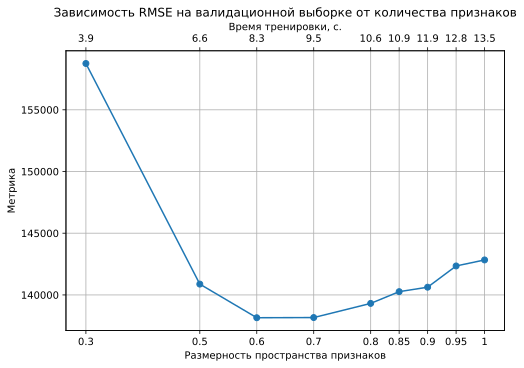

In [74]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(feature_subsample_size, val_scores, marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от количества признаков")
ax.set_xlabel("Размерность пространства признаков")
ax.set_ylabel("Метрика")

ax.set_xticks(ticks=feature_subsample_size)
ax.set_xticklabels(labels=feature_subsample_size)
plt.grid("on")

ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time, decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.savefig("./src/plots/rf_feature_full.svg")
plt.show()

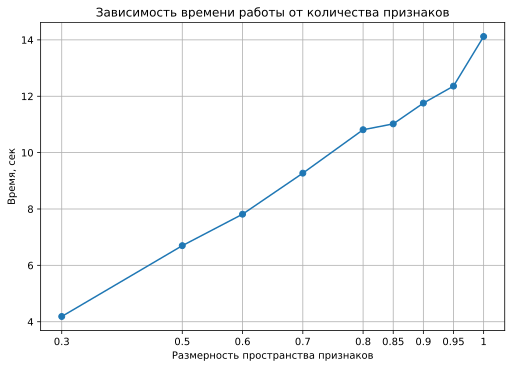

In [104]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(feature_subsample_size, np.array(train_time), marker="o")
ax.set_title("Зависимость времени работы от количества признаков")
ax.set_xlabel("Размерность пространства признаков")
ax.set_ylabel("Время, сек")
ax.set_xticks(ticks=feature_subsample_size)
ax.set_xticklabels(labels=feature_subsample_size)
plt.grid("on")

plt.savefig("./src/plots/rf_n_feature_time.svg")
plt.show()


## max_depth

In [108]:
max_depth = [None, 3, 5, 6, 7, 8, 10, 12]

In [109]:
val_scores = []
train_time = []
for depth in max_depth:
    model = RandomForestRMSE(
        n_estimators=200,
        max_depth=depth,
        feature_subsample_size=0.7
    )
    result = model.fit(
        train, 
        np.array(df.price).reshape(-1),
        val, 
        np.array(df_valid.price).reshape(-1),
        trace=True,
        verbose=100
    )
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))

  2%|▏         | 3/200 [00:00<00:20,  9.45it/s]

Время тренировки 0-ого дерева:  0.118 c.
Время валидации 0-ого дерева:  0.002 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  224536.069
#------------------------------#


 51%|█████     | 102/200 [00:11<00:12,  8.16it/s]

Время тренировки 100-ого дерева:  0.100 c.
Время валидации 100-ого дерева:  0.002 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  124849.136
#------------------------------#


100%|██████████| 200/200 [00:21<00:00,  9.17it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: None
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  20.26 c.
RMSE ансамбля на валидации:  125511.593


  2%|▏         | 4/200 [00:00<00:05, 33.62it/s]

Время тренировки 0-ого дерева:  0.029 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  237573.953
#------------------------------#


 52%|█████▎    | 105/200 [00:03<00:02, 31.90it/s]

Время тренировки 100-ого дерева:  0.022 c.
Время валидации 100-ого дерева:  0.002 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  198661.926
#------------------------------#


100%|██████████| 200/200 [00:06<00:00, 31.73it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  5.15 c.
RMSE ансамбля на валидации:  198006.273


  2%|▏         | 3/200 [00:00<00:08, 22.00it/s]

Время тренировки 0-ого дерева:  0.046 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  215602.883
#------------------------------#


 52%|█████▏    | 104/200 [00:04<00:05, 18.73it/s]

Время тренировки 100-ого дерева:  0.044 c.
Время валидации 100-ого дерева:  0.004 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  162519.579
#------------------------------#


100%|██████████| 200/200 [00:09<00:00, 21.83it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 5
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  7.99 c.
RMSE ансамбля на валидации:  161748.660


  2%|▏         | 3/200 [00:00<00:09, 20.23it/s]

Время тренировки 0-ого дерева:  0.050 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  203786.743
#------------------------------#


 51%|█████     | 102/200 [00:04<00:04, 19.64it/s]

Время тренировки 100-ого дерева:  0.045 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  151530.729
#------------------------------#


100%|██████████| 200/200 [00:09<00:00, 20.35it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 6
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  8.88 c.
RMSE ансамбля на валидации:  151796.068


  1%|          | 2/200 [00:00<00:11, 17.48it/s]

Время тренировки 0-ого дерева:  0.059 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  209570.508
#------------------------------#


 52%|█████▏    | 103/200 [00:05<00:05, 17.02it/s]

Время тренировки 100-ого дерева:  0.044 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  144711.983
#------------------------------#


100%|██████████| 200/200 [00:11<00:00, 17.72it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 7
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  10.31 c.
RMSE ансамбля на валидации:  144746.764


  1%|          | 2/200 [00:00<00:13, 14.57it/s]

Время тренировки 0-ого дерева:  0.071 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  193247.737
#------------------------------#


 52%|█████▏    | 104/200 [00:06<00:06, 15.84it/s]

Время тренировки 100-ого дерева:  0.053 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  136898.121
#------------------------------#


100%|██████████| 200/200 [00:12<00:00, 15.65it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  11.74 c.
RMSE ансамбля на валидации:  137036.036


  1%|          | 2/200 [00:00<00:16, 12.01it/s]

Время тренировки 0-ого дерева:  0.084 c.
Время валидации 0-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  188427.618
#------------------------------#


 51%|█████     | 102/200 [00:07<00:07, 12.52it/s]

Время тренировки 100-ого дерева:  0.067 c.
Время валидации 100-ого дерева:  0.002 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  129315.687
#------------------------------#


100%|██████████| 200/200 [00:15<00:00, 13.08it/s]


Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 10
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  14.19 c.
RMSE ансамбля на валидации:  130093.397


  0%|          | 1/200 [00:00<00:22,  8.81it/s]

Время тренировки 0-ого дерева:  0.097 c.
Время валидации 0-ого дерева:  0.002 c.
RMSE на валидационной выборке для композиции из 1 деревьев:  196350.445
#------------------------------#


 52%|█████▏    | 103/200 [00:09<00:08, 11.26it/s]

Время тренировки 100-ого дерева:  0.073 c.
Время валидации 100-ого дерева:  0.001 c.
RMSE на валидационной выборке для композиции из 101 деревьев:  126569.507
#------------------------------#


100%|██████████| 200/200 [00:18<00:00, 10.90it/s]

Метод: Random Forest
Параметры:
|-> Число деревьев: 200
|-> Макс. глубина дерева: 12
|-> Размерность пространства признаков:  0.700
|-> Доля объектов выборки в каждой подвыборке:  1.000
Время тренировки ансамбля:  17.07 c.
RMSE ансамбля на валидации:  127315.905


In [110]:
max_depth[0] = -1

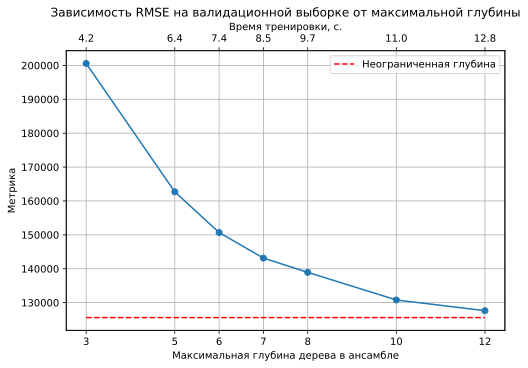

In [79]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(max_depth[1:], val_scores[1:], marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от максимальной глубины")
ax.set_xlabel("Максимальная глубина дерева в ансамбле")
ax.set_ylabel("Метрика")
ax.set_xticks(max_depth[1:])
plt.grid("on")

ax.hlines(val_scores[0], xmin=3, xmax=12, label="Неограниченная глубина", linestyles="dashed", colors="red")
plt.legend()

ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time[1:], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.savefig("./src/plots/rf_depth.svg")
plt.show()

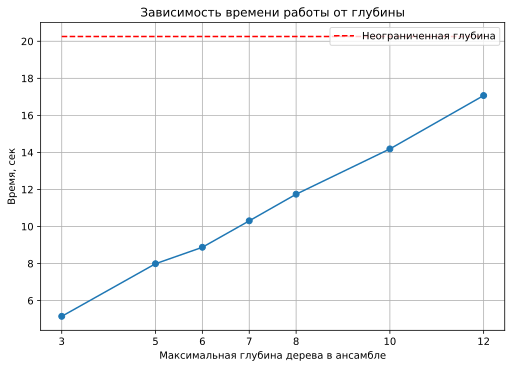

In [112]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(max_depth[1:], np.array(train_time)[1:], marker="o")
ax.set_title("Зависимость времени работы от глубины")
ax.set_xlabel("Максимальная глубина дерева в ансамбле")
ax.set_ylabel("Время, сек")
ax.set_xticks(ticks=max_depth[1:])
ax.set_xticklabels(labels=max_depth[1:])
ax.hlines(train_time[0], xmin=3, xmax=12, label="Неограниченная глубина", linestyles="dashed", colors="red")
plt.legend()
plt.grid("on")

plt.savefig("./src/plots/rf_max_depth_time.svg")
plt.show()

# GB

## n_estimators

In [81]:
from seaborn import scatterplot

In [82]:
model = GradientBoostingRMSE(max_depth=3, learning_rate=0.1, n_estimators=10000)

In [83]:
result = model.fit(
    train, 
    np.array(df.price).reshape(-1),
    val, 
    np.array(df_valid.price).reshape(-1),
    trace=True,
    verbose=1000
)

  0%|          | 10/10000 [00:00<01:45, 94.37it/s]

Время тренировки 0-ого дерева:  0.007
RMSE на тренировочной выборке для бустинга из 1 дерева:  606556.973
RMSE на валидационной выборке для бустинга из 1 дерева:  586448.875
#------------------------------------------------------#


 10%|█         | 1020/10000 [00:10<01:32, 96.82it/s]

Время тренировки 1000-ого дерева:  0.009
RMSE на тренировочной выборке для бустинга из 1001 дерева:  76711.342
RMSE на валидационной выборке для бустинга из 1001 дерева:  118670.450
#------------------------------------------------------#


 20%|██        | 2015/10000 [00:21<01:31, 87.50it/s]

Время тренировки 2000-ого дерева:  0.010
RMSE на тренировочной выборке для бустинга из 2001 дерева:  63634.396
RMSE на валидационной выборке для бустинга из 2001 дерева:  117419.838
#------------------------------------------------------#


 30%|███       | 3019/10000 [00:32<01:14, 93.34it/s]

Время тренировки 3000-ого дерева:  0.009
RMSE на тренировочной выборке для бустинга из 3001 дерева:  55678.106
RMSE на валидационной выборке для бустинга из 3001 дерева:  117454.040
#------------------------------------------------------#


 40%|████      | 4015/10000 [00:43<01:08, 86.77it/s] 

Время тренировки 4000-ого дерева:  0.013
RMSE на тренировочной выборке для бустинга из 4001 дерева:  49831.963
RMSE на валидационной выборке для бустинга из 4001 дерева:  117789.611
#------------------------------------------------------#


 50%|█████     | 5016/10000 [00:54<00:53, 92.53it/s] 

Время тренировки 5000-ого дерева:  0.006
RMSE на тренировочной выборке для бустинга из 5001 дерева:  45375.960
RMSE на валидационной выборке для бустинга из 5001 дерева:  118320.751
#------------------------------------------------------#


 60%|██████    | 6020/10000 [01:04<00:39, 100.44it/s]

Время тренировки 6000-ого дерева:  0.010
RMSE на тренировочной выборке для бустинга из 6001 дерева:  41487.869
RMSE на валидационной выборке для бустинга из 6001 дерева:  118514.773
#------------------------------------------------------#


 70%|███████   | 7017/10000 [01:15<00:32, 92.13it/s] 

Время тренировки 7000-ого дерева:  0.013
RMSE на тренировочной выборке для бустинга из 7001 дерева:  38440.642
RMSE на валидационной выборке для бустинга из 7001 дерева:  118704.391
#------------------------------------------------------#


 80%|████████  | 8016/10000 [01:26<00:21, 93.47it/s]

Время тренировки 8000-ого дерева:  0.011
RMSE на тренировочной выборке для бустинга из 8001 дерева:  35776.046
RMSE на валидационной выборке для бустинга из 8001 дерева:  118802.063
#------------------------------------------------------#


 90%|█████████ | 9021/10000 [01:37<00:09, 101.30it/s]

Время тренировки 9000-ого дерева:  0.013
RMSE на тренировочной выборке для бустинга из 9001 дерева:  33363.669
RMSE на валидационной выборке для бустинга из 9001 дерева:  118932.829
#------------------------------------------------------#


100%|██████████| 10000/10000 [01:47<00:00, 92.68it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 10000
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.333
|-> Learning rate: 0.1
Время тренировки ансамбля:  102.24 c.
RMSE бустинга на тренировке:  31313.629
RMSE бустинга на валидации:  119119.624


In [84]:
check_num_trees = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]) - 1

In [85]:
val_score = result[-1]
train_score = result[0]
train_time = result[1]

/var/folders/qz/fz9mtjj10m7gp4cztqkl_1hw0000gn/T/ipykernel_974/1796438980.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


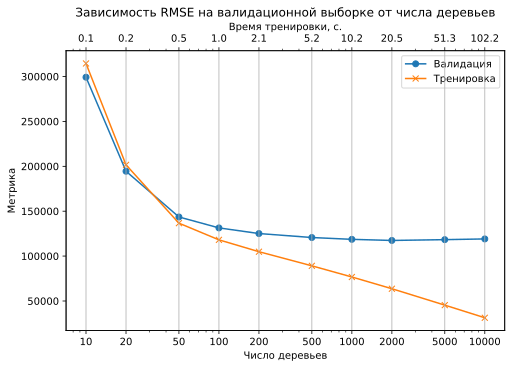

In [86]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(check_num_trees + 1, np.array(val_score)[check_num_trees], marker="o", label="Валидация")
ax.plot(check_num_trees + 1, np.array(train_score)[check_num_trees], marker="x", label="Тренировка")

ax.set_title("Зависимость RMSE на валидационной выборке от числа деревьев")
ax.set_xlabel("Число деревьев")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(ticks=check_num_trees + 1)
ax.set_xticklabels(labels=check_num_trees + 1)
plt.legend()

ax2 = ax.twiny()
ax2.set_xscale("log")       
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(np.cumsum(train_time)[check_num_trees], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom


plt.grid("on")
plt.savefig("./src/plots/gb_n_estimators_full.svg")
fig.show()
plt.show()

/var/folders/qz/fz9mtjj10m7gp4cztqkl_1hw0000gn/T/ipykernel_974/3883395613.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


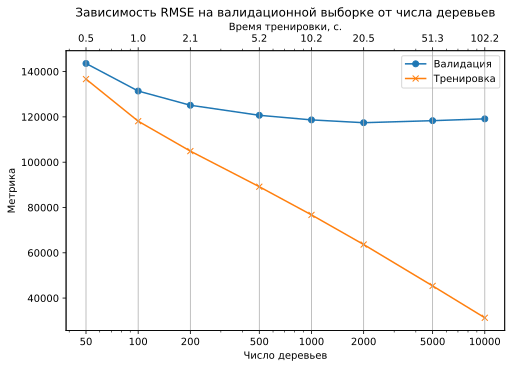

In [87]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(check_num_trees[2:] + 1, np.array(val_score)[check_num_trees[2:]], marker="o", label="Валидация")
ax.plot(check_num_trees[2:] + 1, np.array(train_score)[check_num_trees[2:]], marker="x", label="Тренировка")

ax.set_title("Зависимость RMSE на валидационной выборке от числа деревьев")
ax.set_xlabel("Число деревьев")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(ticks=check_num_trees[2:] + 1)
ax.set_xticklabels(labels=check_num_trees[2:] + 1)
plt.legend()

ax2 = ax.twiny()
ax2.set_xscale("log")       
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(np.cumsum(train_time)[check_num_trees[2:]], decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom


plt.grid("on")
plt.savefig("./src/plots/gb_n_estimators.svg")
fig.show()
plt.show()

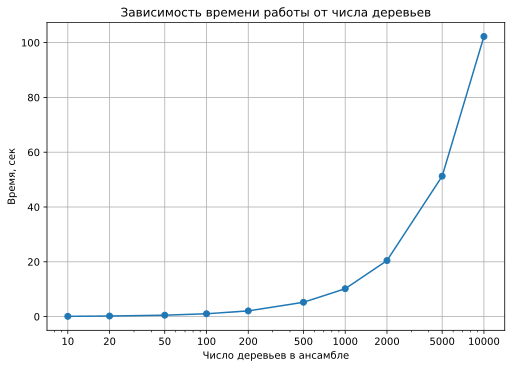

In [88]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(check_num_trees + 1, np.cumsum(train_time)[check_num_trees], marker="o")
ax.set_title("Зависимость времени работы от числа деревьев")
ax.set_xlabel("Число деревьев в ансамбле")
ax.set_ylabel("Время, сек")
ax.set_xscale('log')
ax.set_xticks(ticks=check_num_trees + 1)
ax.set_xticklabels(labels=check_num_trees + 1)

plt.grid("on")
plt.savefig("./src/plots/gb_n_estimators_time.svg")
plt.show()



## feature_subsample_size

In [89]:
feature_subsample_size = [0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]

In [90]:
train_scores = []
val_scores = []
train_time = []
for size in feature_subsample_size:
    model = GradientBoostingRMSE(
        n_estimators=500,
        max_depth=3,
        feature_subsample_size=size
    )
    result = model.fit(
        train, 
        np.array(df.price).reshape(-1),
        val, 
        np.array(df_valid.price).reshape(-1),
        trace=True,
        verbose=1000
    )
    train_scores.append(result[0][-1])
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))


  2%|▏         | 10/500 [00:00<00:04, 98.99it/s]

Время тренировки 0-ого дерева:  0.006
RMSE на тренировочной выборке для бустинга из 1 дерева:  606463.387
RMSE на валидационной выборке для бустинга из 1 дерева:  586188.683
#------------------------------------------------------#


100%|██████████| 500/500 [00:04<00:00, 102.11it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.300
|-> Learning rate: 0.1
Время тренировки ансамбля:  4.61 c.
RMSE бустинга на тренировке:  89835.127
RMSE бустинга на валидации:  119962.951


  1%|          | 6/500 [00:00<00:08, 56.59it/s]

Время тренировки 0-ого дерева:  0.017
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:08<00:00, 61.25it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.500
|-> Learning rate: 0.1
Время тренировки ансамбля:  7.78 c.
RMSE бустинга на тренировке:  87229.422
RMSE бустинга на валидации:  118706.143


  1%|          | 5/500 [00:00<00:09, 49.67it/s]

Время тренировки 0-ого дерева:  0.020
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:09<00:00, 50.87it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.600
|-> Learning rate: 0.1
Время тренировки ансамбля:  9.40 c.
RMSE бустинга на тренировке:  87237.256
RMSE бустинга на валидации:  119741.000


  1%|          | 5/500 [00:00<00:12, 41.14it/s]

Время тренировки 0-ого дерева:  0.026
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:11<00:00, 44.73it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.1
Время тренировки ансамбля:  10.73 c.
RMSE бустинга на тренировке:  86587.319
RMSE бустинга на валидации:  117695.954


  1%|          | 4/500 [00:00<00:13, 37.59it/s]

Время тренировки 0-ого дерева:  0.027
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:12<00:00, 38.61it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  12.44 c.
RMSE бустинга на тренировке:  86231.106
RMSE бустинга на валидации:  121263.543


  1%|          | 4/500 [00:00<00:14, 35.41it/s]

Время тренировки 0-ого дерева:  0.027
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:13<00:00, 36.64it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.850
|-> Learning rate: 0.1
Время тренировки ансамбля:  13.10 c.
RMSE бустинга на тренировке:  85812.769
RMSE бустинга на валидации:  118368.447


  1%|          | 4/500 [00:00<00:14, 34.26it/s]

Время тренировки 0-ого дерева:  0.029
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 34.59it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.900
|-> Learning rate: 0.1
Время тренировки ансамбля:  13.89 c.
RMSE бустинга на тренировке:  85697.420
RMSE бустинга на валидации:  119085.330


  1%|          | 4/500 [00:00<00:15, 32.59it/s]

Время тренировки 0-ого дерева:  0.029
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:15<00:00, 32.26it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.950
|-> Learning rate: 0.1
Время тренировки ансамбля:  14.91 c.
RMSE бустинга на тренировке:  85254.987
RMSE бустинга на валидации:  118373.568


/var/folders/qz/fz9mtjj10m7gp4cztqkl_1hw0000gn/T/ipykernel_974/4247523870.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


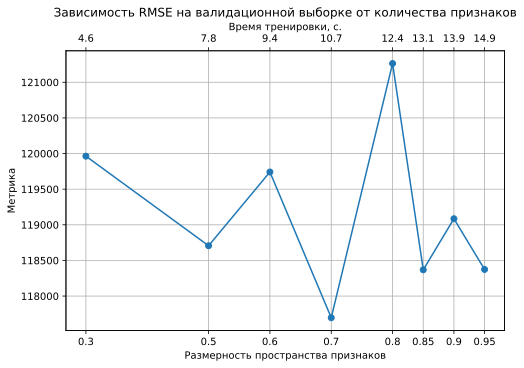

In [91]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(feature_subsample_size, val_scores, marker="o")

ax.set_title("Зависимость RMSE на валидационной выборке от количества признаков")
ax.set_xlabel("Размерность пространства признаков")
ax.set_ylabel("Метрика")
ax.set_xticks(ticks=feature_subsample_size)
ax.set_xticklabels(labels=feature_subsample_size)
plt.grid("on")

ax2 = ax.twiny()
ax2.set_xticks(ax.get_xticks())
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time, decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.savefig("./src/plots/gb_features.svg")
fig.show()
plt.show()



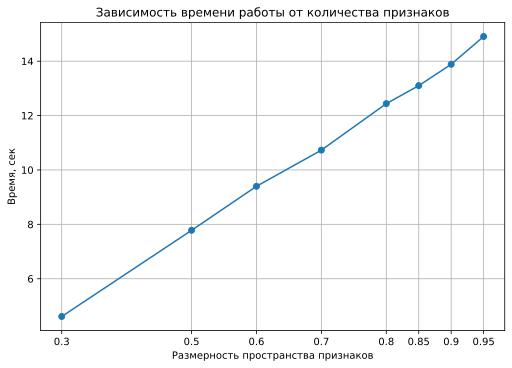

In [92]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(feature_subsample_size, np.array(train_time), marker="o")
ax.set_title("Зависимость времени работы от количества признаков")
ax.set_xlabel("Размерность пространства признаков")
ax.set_ylabel("Время, сек")
ax.set_xticks(ticks=feature_subsample_size)
ax.set_xticklabels(labels=feature_subsample_size)
plt.grid("on")
plt.savefig("./src/plots/gb_n_feature_time.svg")
plt.show()



## max_depth

In [93]:
max_depth = [1, 2, 3, 4, 5, 8, 10]

In [94]:
train_scores = []

val_scores = []
train_time = []
for depth in max_depth:
    model = GradientBoostingRMSE(
        n_estimators=500,
        max_depth=depth,
        feature_subsample_size=0.8
    )
    result = model.fit(
        train, 
        np.array(df.price).reshape(-1),
        val, 
        np.array(df_valid.price).reshape(-1),
        trace=True,
        verbose=500
    )
    train_scores.append(result[0][-1])
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))

  2%|▏         | 8/500 [00:00<00:06, 73.08it/s]

Время тренировки 0-ого дерева:  0.012
RMSE на тренировочной выборке для бустинга из 1 дерева:  608656.940
RMSE на валидационной выборке для бустинга из 1 дерева:  587090.116
#------------------------------------------------------#


100%|██████████| 500/500 [00:05<00:00, 86.78it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 1
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  5.32 c.
RMSE бустинга на тренировке:  149876.771
RMSE бустинга на валидации:  148572.958


  1%|          | 6/500 [00:00<00:09, 51.42it/s]

Время тренировки 0-ого дерева:  0.020
RMSE на тренировочной выборке для бустинга из 1 дерева:  605291.173
RMSE на валидационной выборке для бустинга из 1 дерева:  583999.993
#------------------------------------------------------#


100%|██████████| 500/500 [00:09<00:00, 52.91it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 2
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  8.96 c.
RMSE бустинга на тренировке:  107222.090
RMSE бустинга на валидации:  123541.269


  1%|          | 4/500 [00:00<00:13, 36.89it/s]

Время тренировки 0-ого дерева:  0.026
RMSE на тренировочной выборке для бустинга из 1 дерева:  602298.102
RMSE на валидационной выборке для бустинга из 1 дерева:  581393.414
#------------------------------------------------------#


100%|██████████| 500/500 [00:12<00:00, 38.90it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 3
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  12.35 c.
RMSE бустинга на тренировке:  86231.106
RMSE бустинга на валидации:  121561.228


  1%|          | 4/500 [00:00<00:16, 30.86it/s]

Время тренировки 0-ого дерева:  0.034
RMSE на тренировочной выборке для бустинга из 1 дерева:  600508.547
RMSE на валидационной выборке для бустинга из 1 дерева:  578892.065
#------------------------------------------------------#


100%|██████████| 500/500 [00:16<00:00, 30.80it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  15.73 c.
RMSE бустинга на тренировке:  68893.171
RMSE бустинга на валидации:  116769.413


  1%|          | 3/500 [00:00<00:20, 24.33it/s]

Время тренировки 0-ого дерева:  0.041
RMSE на тренировочной выборке для бустинга из 1 дерева:  599272.159
RMSE на валидационной выборке для бустинга из 1 дерева:  578103.164
#------------------------------------------------------#


100%|██████████| 500/500 [00:19<00:00, 25.36it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 5
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  19.17 c.
RMSE бустинга на тренировке:  54878.549
RMSE бустинга на валидации:  122027.483


  0%|          | 2/500 [00:00<00:30, 16.16it/s]

Время тренировки 0-ого дерева:  0.061
RMSE на тренировочной выборке для бустинга из 1 дерева:  596479.573
RMSE на валидационной выборке для бустинга из 1 дерева:  576872.758
#------------------------------------------------------#


100%|██████████| 500/500 [00:29<00:00, 16.69it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 8
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  29.34 c.
RMSE бустинга на тренировке:  21493.261
RMSE бустинга на валидации:  124223.408


  0%|          | 2/500 [00:00<00:37, 13.16it/s]

Время тренировки 0-ого дерева:  0.074
RMSE на тренировочной выборке для бустинга из 1 дерева:  595400.905
RMSE на валидационной выборке для бустинга из 1 дерева:  576704.149
#------------------------------------------------------#


100%|██████████| 500/500 [00:36<00:00, 13.72it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 10
|-> Размерность пространства признаков:  0.800
|-> Learning rate: 0.1
Время тренировки ансамбля:  35.84 c.
RMSE бустинга на тренировке:  11667.073
RMSE бустинга на валидации:  127921.636


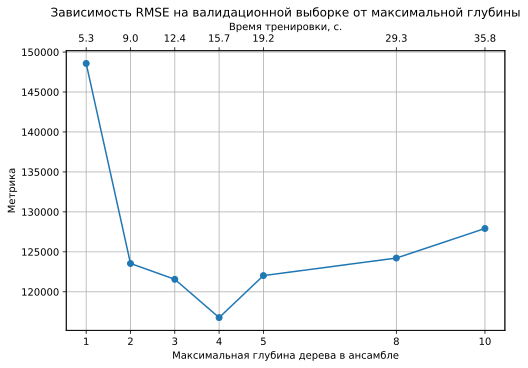

In [95]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(max_depth, val_scores, marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от максимальной глубины")
ax.set_xlabel("Максимальная глубина дерева в ансамбле")
ax.set_ylabel("Метрика")
ax.set_xticks(max_depth)

plt.grid("on")
ax2 = ax.twiny()
ax2.set_xticks(max_depth)
ax2.set_xbound(ax.get_xbound())

ax2.set_xticklabels(labels=np.round(train_time, decimals=1))
ax2.set_xlabel('Время тренировки, с.')

ax2.xaxis.set_ticks_position('top') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('top') # set the position of the second x-axis to bottom

plt.savefig("./src/plots/gb_depth.svg")
plt.show()


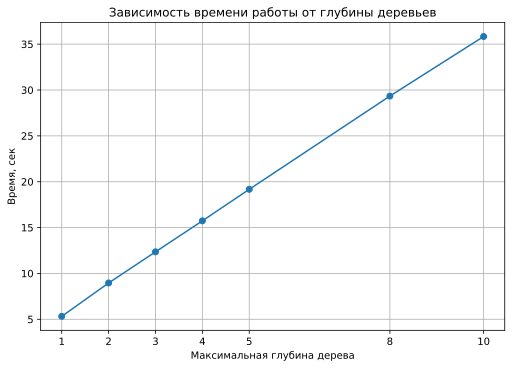

In [96]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(max_depth, np.array(train_time), marker="o")
ax.set_title("Зависимость времени работы от глубины деревьев")
ax.set_xlabel("Максимальная глубина дерева")
ax.set_ylabel("Время, сек")
ax.set_xticks(ticks=max_depth)
ax.set_xticklabels(labels=max_depth)

plt.grid("on")
plt.savefig("./src/plots/gb_max_depth_time.svg")
plt.show()


## learning rate

In [105]:
learning_rate = [1, 0.1, 0.01, 0.001, 0.0001]

In [106]:
train_scores = []
val_scores = []
train_time = []
for lr in learning_rate:
    model = GradientBoostingRMSE(
        max_depth=4,
        n_estimators=500,
        feature_subsample_size=0.7, 
        learning_rate=lr
    )
    result = model.fit(
        train, 
        np.array(df.price).reshape(-1),
        val, 
        np.array(df_valid.price).reshape(-1),
        trace=True,
        verbose=500
    )
    train_scores.append(result[0][-1])
    val_scores.append(result[-1][-1])
    train_time.append(np.sum(result[1]))

  1%|          | 6/500 [00:00<00:19, 25.16it/s]

Время тренировки 0-ого дерева:  0.046
RMSE на тренировочной выборке для бустинга из 1 дерева:  209413.368
RMSE на валидационной выборке для бустинга из 1 дерева:  214868.482
#------------------------------------------------------#


100%|██████████| 500/500 [00:15<00:00, 31.46it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 1
Время тренировки ансамбля:  15.23 c.
RMSE бустинга на тренировке:  32314.089
RMSE бустинга на валидации:  183817.633


  1%|          | 4/500 [00:00<00:15, 32.40it/s]

Время тренировки 0-ого дерева:  0.036
RMSE на тренировочной выборке для бустинга из 1 дерева:  600508.547
RMSE на валидационной выборке для бустинга из 1 дерева:  578892.065
#------------------------------------------------------#


100%|██████████| 500/500 [00:15<00:00, 33.17it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.1
Время тренировки ансамбля:  14.50 c.
RMSE бустинга на тренировке:  69264.833
RMSE бустинга на валидации:  117008.702


  1%|          | 4/500 [00:00<00:14, 33.08it/s]

Время тренировки 0-ого дерева:  0.033
RMSE на тренировочной выборке для бустинга из 1 дерева:  653551.369
RMSE на валидационной выборке для бустинга из 1 дерева:  632253.882
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 34.03it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.01
Время тренировки ансамбля:  14.13 c.
RMSE бустинга на тренировке:  113351.161
RMSE бустинга на валидации:  130974.978


  1%|          | 4/500 [00:00<00:14, 33.52it/s]

Время тренировки 0-ого дерева:  0.033
RMSE на тренировочной выборке для бустинга из 1 дерева:  658885.204
RMSE на валидационной выборке для бустинга из 1 дерева:  637624.661
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 34.61it/s]


Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.001
Время тренировки ансамбля:  13.89 c.
RMSE бустинга на тренировке:  430331.489
RMSE бустинга на валидации:  412982.570


  1%|          | 4/500 [00:00<00:14, 33.78it/s]

Время тренировки 0-ого дерева:  0.033
RMSE на тренировочной выборке для бустинга из 1 дерева:  659418.856
RMSE на валидационной выборке для бустинга из 1 дерева:  638162.052
#------------------------------------------------------#


100%|██████████| 500/500 [00:14<00:00, 34.64it/s]

Метод: Gradient Boosting
Параметры:
|-> Число деревьев: 500
|-> Макс. глубина дерева: 4
|-> Размерность пространства признаков:  0.700
|-> Learning rate: 0.0001
Время тренировки ансамбля:  13.89 c.
RMSE бустинга на тренировке:  630868.763
RMSE бустинга на валидации:  609884.326


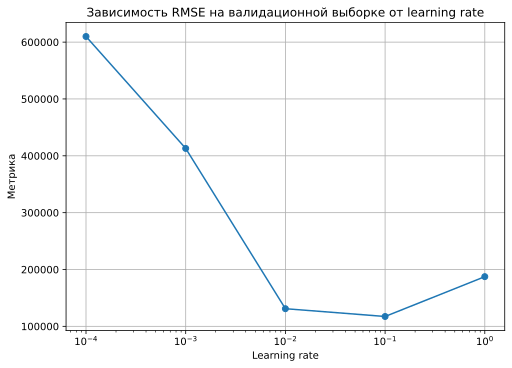

In [99]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.plot(learning_rate, val_scores, marker="o")
ax.set_title("Зависимость RMSE на валидационной выборке от learning rate")
ax.set_xlabel("Learning rate")
ax.set_ylabel("Метрика")
ax.set_xscale("log")
ax.set_xticks(learning_rate)
plt.grid("on")

plt.savefig("./src/plots/gb_lr_full.svg")
plt.show()


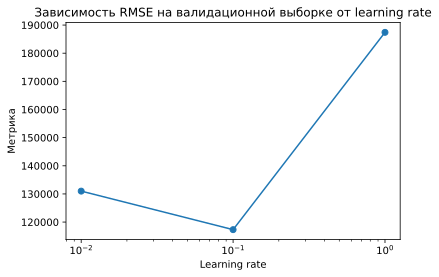

In [100]:
plt.plot(list(reversed(learning_rate[:3])), list(reversed(val_scores[:3])), marker="o")
plt.title("Зависимость RMSE на валидационной выборке от learning rate")
plt.xlabel("Learning rate")
plt.ylabel("Метрика")
plt.xscale("log")

plt.savefig("./src/plots/gb_lr.svg")
plt.show()


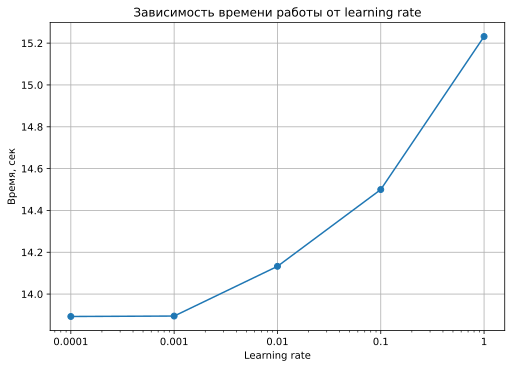

In [107]:
fig, ax = plt.subplots(figsize=(7, 5), constrained_layout=True)
ax.plot(learning_rate, np.array(train_time), marker="o")
ax.set_title("Зависимость времени работы от learning rate")
ax.set_xlabel("Learning rate")
ax.set_ylabel("Время, сек")
ax.set_xscale("log")
ax.set_xticks(ticks=learning_rate)
ax.set_xticklabels(labels=learning_rate)
plt.grid("on")

plt.savefig("./src/plots/gb_lr_time.svg")
plt.show()
